# Pymaceuticals Inc.
---
MONU-VIRT-DATA-PT-05-2023-U-LOLC-MTTH > Assignments > Module 2

Student:  Mireille Walton 
(email: mmj649@gmail.com)

### Analysis

Students have been tasked with undertaking an analysis of a clinial trial testing drug treatments on tumors within mice. 

To assist with analysing the data, the following charts have been prepared:
- Bar chart - Total Timepoints by Drug Regimen
- Pie chart - Gender % of mice within the trial
- Box plot - Final Tumor Volume by Drug Regimen
- Line chart - Tumor Volume by Timepoint (Capomulin)
- Scatter plot x 2 - Average Tumor Volume by Weight
    
    
### Observations
#### Box plot - Final Tumor Volume by Drug Regimen

This chart shows clearly the variation of total tumor volume in mice treated with the drugs Campomulin, Ramicane, Ifubinol and Ceftamin. 

Of the four drugs treatments included in this chart, Capomulin and Ramicane showed greater effectiveness with Final Tumor Volumes associated with these drugs being distinctly lower than those treated with Infubinol and Ceftamin.  Infubinol displays an outlier anomoly with a Total Tumor Volume approximately equivalent to the mean Final Tumor Volume of mice treated with the drug Ramicane. 

In comparing the boxes for each of Capomulin and Ramicane, it can be seen that there is a greater variance in Final Tumor Volumes in mice treated Ramicane, than mice treated with Capomulin.   

#### Line chart - Tumor Volume by Timepoint (Capomulin)
This line chart plots the tumor volume over time of one mouse being treated with Capomulin, in this case Mouse ID j119.  The code used to prepare this chart selects a mouse at random and it is possible to view the results of different mice by re-running the code.  

The line charting the results of the treatment shows an overall trend in reduction of Tumor Volume over time, interspersed with periods of tumor growth. Without additional information (ie dosage strengh and interval), it is difficult to draw additional conclusions which are not based on assumption.  

#### Scatter plot (#2) - Average Tumor Volume by Weight (correlation and regression)
The Pearson correlation coefficient has be used to analyse the linear relationship between the variables "Average Tumor Volume" and "Weight". The result of this formula, r0.84 determines that a very strong relationship exists between the two variables (DATAtab, 2023).  It is therefore it is possible to predict the approximate tumor volume based on weight. 

The scatter plot diagram provides an effective visual representation of this data.   

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Dataframe_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
Dataframe_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.

count_mice = Dataframe_df["Mouse ID"].nunique()
count_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Obtain and display the duplicate/s by Mouse ID and Timepoint. 

duplicate_mice = Dataframe_df.duplicated(keep="first")
show_duplicate_mice1 = Dataframe_df[duplicate_mice]
show_duplicate_mice1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Obtain all the data relating to the duplicate mouse ID. 

duplicate_mice2 = Dataframe_df.duplicated(["Mouse ID","Timepoint"], keep="first")
show_duplicate_mice2 = Dataframe_df[duplicate_mice2]
print(show_duplicate_mice2)


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [6]:
#Remove the data relating to the duplicate mouse and create a new, clean dataframe

drop_mouse_g989 = "g989"
cleaned_data_df = Dataframe_df[Dataframe_df["Mouse ID"]!= drop_mouse_g989]
cleaned_data_df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22


In [7]:
#Double check the number of mice within the data frame is as expected

mouse_id_count = cleaned_data_df["Mouse ID"].nunique()
print("Unique Mouse ID count:", mouse_id_count)


Unique Mouse ID count: 248


## Summary Statistics

In [8]:
# Prepare a summary of statistics showing the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug treatment

print (cleaned_data_df["Tumor Volume (mm3)"].mean())
print (cleaned_data_df["Tumor Volume (mm3)"].median())
print (cleaned_data_df["Tumor Volume (mm3)"].var())
print (cleaned_data_df["Tumor Volume (mm3)"].std())
print (cleaned_data_df["Tumor Volume (mm3)"].sem())

50.435293232255404
48.933453655
79.46290714557342
8.914196943391671
0.20559062186986282


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug treatment: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

sum_stats = mouse_metadata.set_index(["Drug Regimen"])
mn_tmr = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
md_tmr = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
vr_tmr = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tmr = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tmr = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

sum_stats_data ={"Mean Tumor Volume":mn_tmr,
                "Median Tumor Volume":md_tmr,
                "Tumor Volume Variance":vr_tmr,
                "Tumor Volume Std Var":std_tmr,
                "Tumor Volume Std Err":sem_tmr}

#Create a new dataframe summarising the results and display the data

sum_stats_df = pd.DataFrame(sum_stats_data)
sum_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Var,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Use a more advanced code using the aggregate method in a single line of code to generate the same table 
#Code Ref: Moffatt C, 9 November 2022; W3Schools, date unknown; 

sum_stats =({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
cleaned_data_df.groupby(["Drug Regimen"]).agg(sum_stats)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

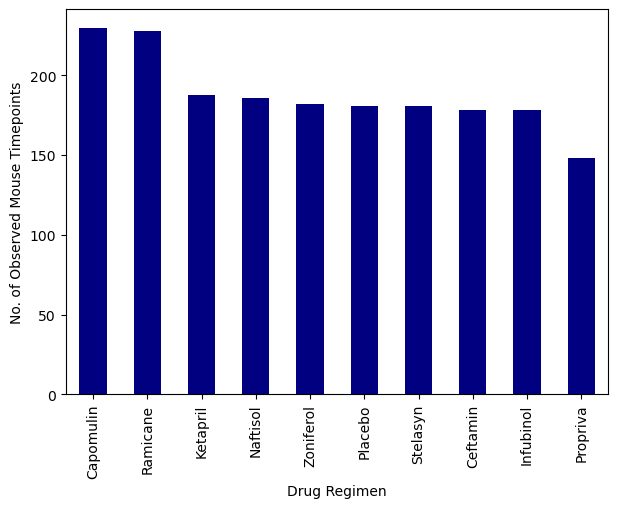

In [11]:
# Use pandas to create a box plot to display total Mouse ID Timepoints for each drug

drug_timepoint = cleaned_data_df.groupby("Drug Regimen")["Timepoint"].count()
drug_tp_chart = drug_timepoint.sort_values(ascending=False)
drug_tp_chart.plot(kind="bar", color="navy", figsize=(7, 5))
plt.ylabel("No. of Observed Mouse Timepoints")
plt.show()


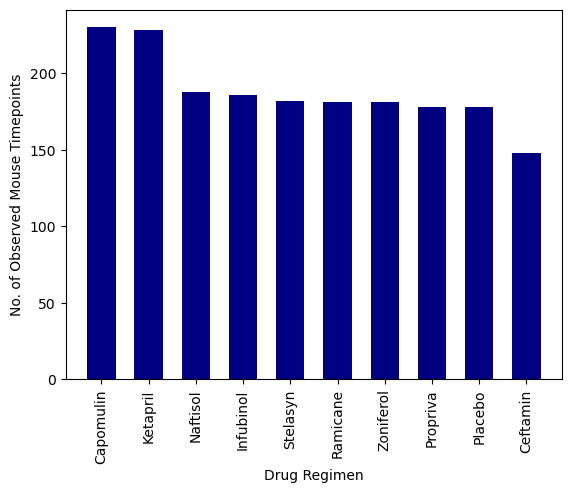

In [12]:
# Use pyplot to create a box plot to display total Mouse ID Timepoints for each drug
# Code ref: Zach 2023

x_axis_drug = cleaned_data_df["Drug Regimen"].unique()
timepoint2 = cleaned_data_df.groupby("Drug Regimen")["Timepoint"].count()
y_axis_timepoint = timepoint2.sort_values(ascending=False)
x_axis = np.arange(0,len(x_axis_drug))
tick_drug=[]
for drug in x_axis:
    tick_drug.append(drug)
plt.xlim(-.75, len(x_axis)-.25)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis_timepoint, facecolor="navy", align="center",width=0.6)
plt.xticks(tick_drug,x_axis_drug, rotation=90)
plt.show()

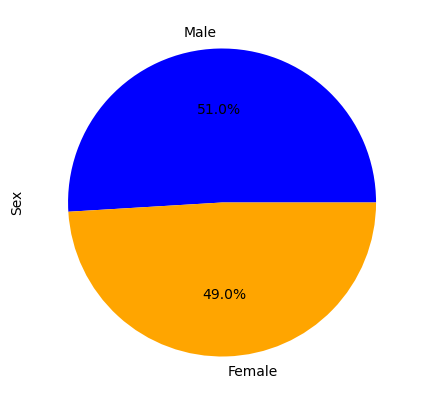

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender = cleaned_data_df["Sex"].value_counts()
Gender.plot(kind="pie", autopct='%1.1f%%', colors=["blue","orange"], figsize=(7, 5), subplots=True)
plt.show()

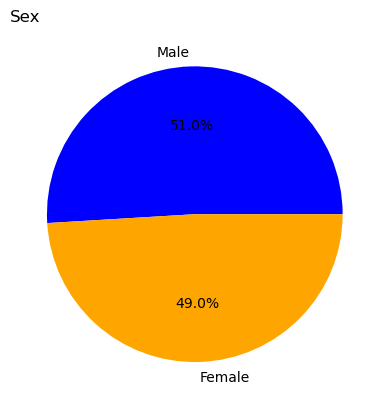

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = cleaned_data_df["Sex"].value_counts()
Labels = ["Male", "Female"]
Colors = ["blue", "orange"]
plt.pie(Gender, labels=Labels, colors=Colors, autopct="%1.1f%%")
plt.title('Sex', loc='left')  
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tmr = cleaned_data_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tmr = max_tmr.reset_index()
max_tmr_df = pd.DataFrame(max_tmr)
LastTP_df = max_tmr.merge(cleaned_data_df,on=["Mouse ID","Timepoint"], how="left")

#Check the dataframe
LastTP_df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

List_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tmr_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for each_drug in List_drug:
    drug_data = LastTP_df[LastTP_df["Drug Regimen"]==each_drug]
    tmr_vol = drug_data["Tumor Volume (mm3)"]
    tmr_vol_data.append(tmr_vol)     
    
    quartiles = tmr_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
    
    outliers = tmr_vol.loc[(tmr_vol < lower_bound) | (tmr_vol > upper_bound)]
    print (f"{each_drug}'s potential outliers:",outliers)
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


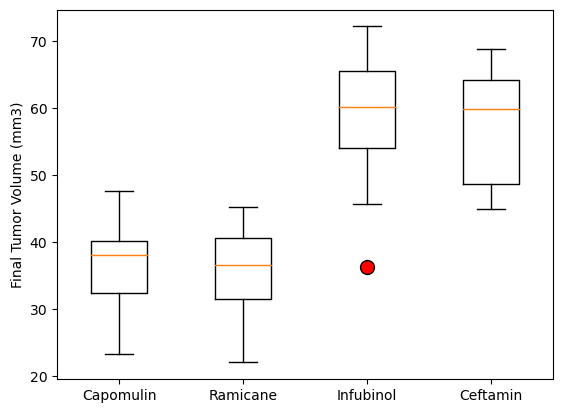

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tmr_vol_data, labels=List_drug, flierprops={"markerfacecolor": "red", "marker": "o", "markersize": 10})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

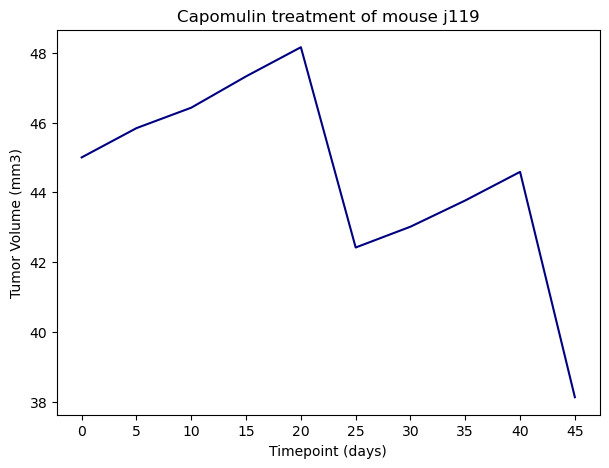

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Random_mouse_ID = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin", "Mouse ID"].sample(1).iloc[0]
Random_mouse_data = cleaned_data_df.loc[cleaned_data_df["Mouse ID"] == Random_mouse_ID]
x_axis = np.arange(len(Random_mouse_data["Timepoint"]))
x_ticks = [value for value in x_axis]
plt.figure(figsize=(7,5))
plt.plot(x_axis, Random_mouse_data["Tumor Volume (mm3)"], color = "navy")
plt.xticks(x_ticks, Random_mouse_data["Timepoint"])
plt.title(f"Capomulin treatment of mouse {Random_mouse_ID}")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

/Users/mireille.walton/anaconda3/envs/Bootcamp/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

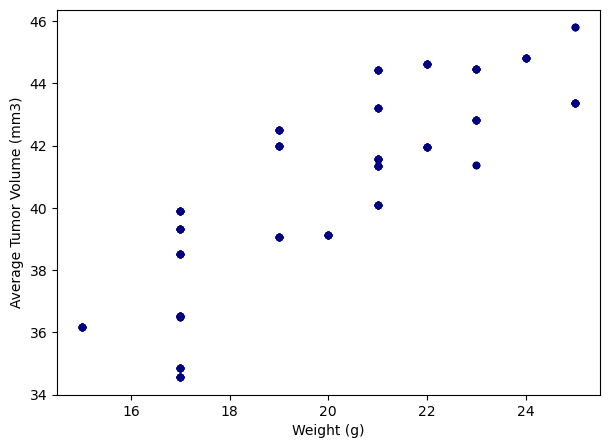

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Avg_tmr = cleaned_data_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
Avg_tmr_vol = Avg_tmr.reset_index()
Avg_tmr_vol_df = pd.DataFrame(Avg_tmr)
Avg_Tmr_Wgt_df = Avg_tmr_vol_df.merge(cleaned_data_df,on=["Mouse ID"], how="left")
Avg_Tmr_Wgt_df.rename(columns = {"Tumor Volume (mm3)_x":"Average Tumor Volume (mm3)"}, inplace=True)
Capomulin_data = Avg_Tmr_Wgt_df[Avg_Tmr_Wgt_df["Drug Regimen"].isin(["Capomulin"])]
Capomulin_data.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(7,5), color="navy", ylabel="Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


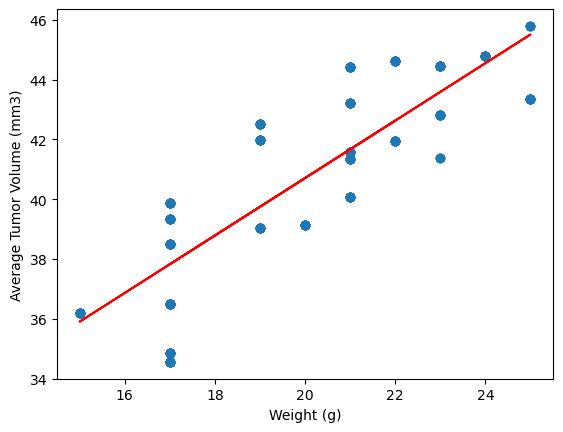

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
y_AvgT_Vol = Capomulin_data["Average Tumor Volume (mm3)"]
x_Weight = Capomulin_data["Weight (g)"]

correlation = st.pearsonr(x_Weight, y_AvgT_Vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_Weight, y_AvgT_Vol)
regress_values = x_Weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_Weight, y_AvgT_Vol)
plt.plot(x_Weight, regress_values, "r-")
#plt.annotate(line_eq, (20, 35), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()